# Totorial: 3

This tutorial we are going to have in 2 phases.


## Phase: 1

### Implementation of Node2Vec using Python.

In this tutorial we are going to learn about the implementation of Node2vec Algorithm from screatch.

Following are the Requirements for this Implementation.

1. Python 3.0 +
5. gensim (word2vec)

### Node2vec:

#### Brief Explanation:

The main difference between node2vec and deepwalk is in doing random walks.

- Node2vec performs ```biased Random Walks``` in order to efficiently explore diverse neighborhoods.

In [6]:
# Importing nessesary Libraries 

import networkx as nx # to visulaize and load graph data
import random
import numpy as np
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec # for implimenting Skip-Gram Model

import matplotlib.pyplot as plt

from IPython.display import display
from PIL import Image

### Let's first look at Psudo code of node2vec.


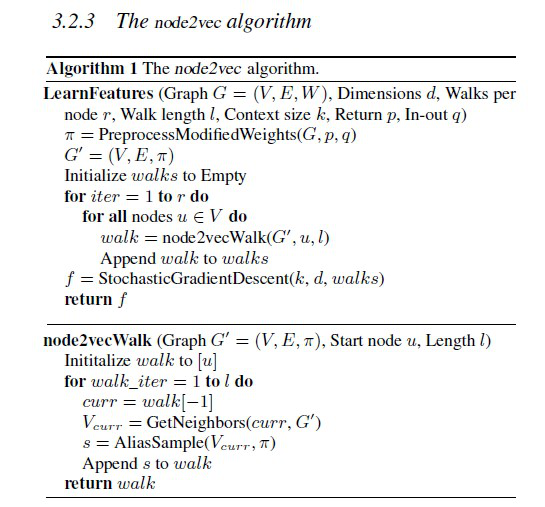

In [5]:
display(Image.open('C:/Users/ANIMESH/Desktop/ANI PC/PHD/Graph ML/Graph-Machine-Learning-IITKGP/Images/Node2vec.jpg'))

### *Reference:* https://arxiv.org/abs/1607.00653

The biased random walk balances between *breadth-first sampling* (where only local neighbours are visited) and *depth-first sampling* (where distant neighbours are visited) by introducing the following two parameters:

1. **Return parameter (p):** Controls the likelihood of immediately revisiting a node in the walk. Setting it to a high value encourages moderate exploration, while setting it to a low value would keep the walk local.

2. **In-out parameter (q):** Allows the search to differentiate between inward and outward nodes. Setting it to a high value biases the random walk towards local nodes, while setting it to a low value biases the walk to visit nodes which are further away.

In [7]:
# function for computing probabilities 

def compute_probabilities(graph, probs, p, q):

    """
    graph: expects graph
    probs: expects empty dictonary to compute probabilities of all the neighboring nodes of a node
    p: return parameter
    q: in-out parameter
    
    """
    G = graph
    for source_node in G.nodes():
        for current_node in G.neighbors(source_node):
            probs_ = list()
            for destination in G.neighbors(current_node):

                if source_node == destination:
                    prob_ = G[current_node][destination].get('weight',1) * (1/p)
                elif destination in G.neighbors(source_node):
                    prob_ = G[current_node][destination].get('weight',1)
                else:
                    prob_ = G[current_node][destination].get('weight',1) * (1/q)

                probs_.append(prob_)

            probs[source_node]['probabilities'][current_node] = probs_/np.sum(probs_)
    
    return probs

In [8]:
## 'Generating Biased Random Walks'

def generate_random_walks(graph,probs,max_walks, walk_len):


    """
    graph: expects graph
    probs: computed probabilities 
    max_walks: maximum number of walks per node
    walk_len: max walk length 
    
    """
    
    G = graph
    walks = list()
    for start_node in G.nodes():
        for i in range(max_walks):
            
            walk = [start_node]
            walk_options = list(G[start_node])
            if len(walk_options)==0:
                break
            first_step = np.random.choice(walk_options)
            walk.append(first_step)
            
            for k in range(walk_len-2):
                walk_options = list(G[walk[-1]])
                if len(walk_options)==0:
                    break
                probabilities = probs[walk[-2]]['probabilities'][walk[-1]]
                next_step = np.random.choice(walk_options, p=probabilities)
                walk.append(next_step)
            
            walks.append(walk)
    np.random.shuffle(walks)
    walks = [list(map(str,walk)) for walk in walks]
    
    return walks

In [9]:
# creating the final function Node2Vec which will take all the walks vector as argument and return the embedding

def Node2Vec(generated_walks,window_size,embedding_vector_size):
    """
    Compute the node embeddings for the generated walks
    :param walks: List of walks
    :window_size: definr window size of list of nodes 
    :embedding_vector_size: what embedding vector size you want 
    :return:
    """
    model = Word2Vec(sentences=generated_walks, window=window_size, vector_size=embedding_vector_size)
    return model.wv

In [10]:
# importing the karate club graph
G = nx.karate_club_graph()

In [11]:
from collections import defaultdict

probs = defaultdict(dict)
for node in G.nodes():
    probs[node]['probabilities'] = dict()

In [12]:
probs

defaultdict(dict,
            {0: {'probabilities': {}},
             1: {'probabilities': {}},
             2: {'probabilities': {}},
             3: {'probabilities': {}},
             4: {'probabilities': {}},
             5: {'probabilities': {}},
             6: {'probabilities': {}},
             7: {'probabilities': {}},
             8: {'probabilities': {}},
             9: {'probabilities': {}},
             10: {'probabilities': {}},
             11: {'probabilities': {}},
             12: {'probabilities': {}},
             13: {'probabilities': {}},
             14: {'probabilities': {}},
             15: {'probabilities': {}},
             16: {'probabilities': {}},
             17: {'probabilities': {}},
             18: {'probabilities': {}},
             19: {'probabilities': {}},
             20: {'probabilities': {}},
             21: {'probabilities': {}},
             22: {'probabilities': {}},
             23: {'probabilities': {}},
             24: {'probabilities

In [13]:
cp = compute_probabilities(G,probs,1,1)

walks = generate_random_walks(G,cp,5,10)

In [14]:
walks

[['21', '1', '2', '32', '33', '30', '1', '0', '7', '2'],
 ['8', '32', '31', '25', '31', '0', '11', '0', '4', '0'],
 ['22', '33', '30', '33', '8', '0', '2', '28', '33', '29'],
 ['10', '5', '0', '8', '2', '8', '30', '33', '23', '33'],
 ['14', '32', '15', '33', '9', '2', '32', '22', '32', '8'],
 ['30', '1', '13', '3', '1', '21', '1', '21', '1', '13'],
 ['18', '33', '26', '29', '23', '33', '20', '32', '22', '33'],
 ['12', '3', '13', '0', '2', '3', '12', '3', '2', '28'],
 ['3', '12', '0', '11', '0', '11', '0', '8', '30', '33'],
 ['21', '1', '30', '8', '2', '0', '7', '2', '7', '0'],
 ['18', '32', '8', '2', '13', '1', '2', '3', '12', '0'],
 ['26', '29', '26', '29', '33', '31', '33', '14', '32', '30'],
 ['33', '28', '33', '31', '0', '1', '7', '1', '19', '1'],
 ['7', '2', '28', '2', '9', '2', '0', '1', '0', '8'],
 ['32', '33', '20', '33', '27', '33', '23', '25', '31', '0'],
 ['3', '13', '1', '19', '0', '12', '0', '31', '33', '8'],
 ['29', '23', '29', '33', '19', '33', '27', '24', '25', '23'],
 

In [15]:
# generate embeddings

n2v_emb = Node2Vec(walks,20,20)

In [16]:
# embeddings

n2v_emb.vectors

array([[-0.03188552,  0.0010854 ,  0.06385962,  0.04248859, -0.03925578,
        -0.04181724,  0.0754526 ,  0.09786997, -0.07735927, -0.02179432,
         0.0681664 , -0.02060695, -0.03451886,  0.00617417, -0.00821259,
        -0.00163513,  0.08367915,  0.00646748, -0.07870723, -0.08005453],
       [ 0.00398874,  0.0251931 ,  0.080423  ,  0.00033459,  0.04289198,
        -0.02403423,  0.0472347 ,  0.08913742, -0.10114092, -0.02334718,
        -0.00058204, -0.02071052,  0.03666057, -0.07178448,  0.00671423,
        -0.00160936,  0.123171  , -0.02860313, -0.0415401 , -0.06400222],
       [-0.07600515,  0.0252704 , -0.00911808, -0.02427826,  0.00558237,
        -0.00791479,  0.00264041,  0.09937774, -0.02424776,  0.04243394,
        -0.01128565,  0.01004442, -0.02932253, -0.01988574,  0.05985138,
        -0.01604498,  0.08977409, -0.0323319 , -0.05458677,  0.01504686],
       [-0.03267932,  0.00133517,  0.01379753, -0.04135185, -0.00139981,
         0.00751372,  0.03396744,  0.07390207, -

## Phase: 2

- Library Implimentation of `Node2Vec`
- Classification of graph using `node embeddings (node2Vec)`

In [17]:
# Importing Libraries 

import numpy as np
import pandas as pd
import networkx as nx
import torch_geometric
import torch


### Implementation using karateclub


In [18]:
from karateclub import Node2Vec

In [19]:
# importing the karate club graph

G = nx.karate_club_graph()

In [20]:
# Defining model 

model = Node2Vec(walk_length=20,walk_number=10,window_size=20,dimensions=20,p=1.0,q=0.5)
model.fit(G)

embeddings = model.get_embedding()

In [21]:
embeddings.shape

(34, 20)

In [22]:
club_labels = nx.get_node_attributes(G,'club')

y = np.array(list(club_labels.values()))


In [23]:
y.shape

(34,)

In [24]:
# Importing libraries for classification

import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.20, random_state=42)

# defining model

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

# fitting the model
logisticRegr.fit(X_train, y_train)

# making predictions
y_pred = logisticRegr.predict(X_test)

In [26]:
# Measuring model performance

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Mr. Hi       0.75      1.00      0.86         3
     Officer       1.00      0.75      0.86         4

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7

